In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from pyvis.network import Network

In [13]:
G = nx.complete_graph(50)
nt = Network(height='750px',
                  width='100%',
                  bgcolor='#222222',
                  font_color='white',
                  notebook=True)
for edge in G.edges(data=True):
    edge[2]['weight'] = random.randint(1,10)
nt.from_nx(G)
nt.barnes_hut()
#for edge in nt.get_edges():
#     edge['weight'] = random.randint(1,10)
nt.show('nx.html')
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=True, font_weight='bold')
# edge_weight = nx.get_edge_attributes(G,'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
# plt.figure(figsize=(23, 23))
# plt.show()

In [16]:
def search(g, parent, i):
        if parent[i] == i:
            return i
        return search(g, parent, parent[i])

def apply_union(g, parent, rank, x, y):
        xroot = search(g, parent, x)
        yroot = search(g, parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
  
def kruskal(graph):
        result = []
        i, e = 0, 0
        graph = sorted(graph.edges(data=True), key=lambda t: t[2].get('weight', 1))
        parent = []
        rank = []
        for node in range(50):
            parent.append(node)
            rank.append(0)
        while e < 50 - 1:
            u, v, w = graph[i]
            i = i + 1
            x = search(graph, parent, u)
            y = search(graph, parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                apply_union(graph, parent, rank, x, y)
        new_graph = Network(height='750px',
                  width='100%',
                  bgcolor='#222222',
                  font_color='white',
                  notebook=True)
        result_set = set()
        for u, v, weight in result:
            result_set.add(u)
            result_set.add(v)
        for n in result_set:
            new_graph.add_node(n, size = 10)
        for u, v, weight in result:
            new_graph.add_edge(u,v,value=int(weight['weight']))
        return new_graph
            
tree = kruskal(G)
tree.show('nx.html')

Так как количество ребер с весом 1 никто не ограничивал, остовное дерево почти полностью состоит из них

In [10]:
rand = [random.randint(0,50) for i in range(5)]
for edge in tree.get_edges():
    if edge['to'] in rand:
        edge['value'] = random.randint(1,3)
tree.show('nx.html')

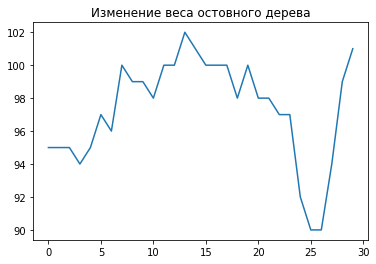

In [21]:
tree_weights = []
for i in range(30):
    edges = tree.get_edges()
    tree_weights.append(sum([edge['value'] for edge in edges]))
    rand = [random.randint(0,50) for i in range(5)]
    for edge in edges:
        if edge['to'] in rand:
            edge['value'] = random.randint(1,3)
fig, ax = plt.subplots()
ax.set_title('Изменение веса остовного дерева')
plt.plot(tree_weights)      

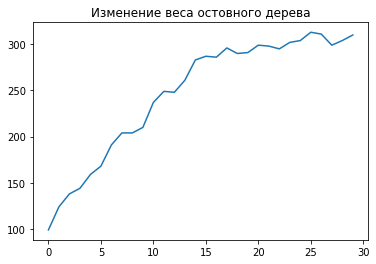

In [22]:
tree_weights = []
for i in range(30):
    edges = tree.get_edges()
    tree_weights.append(sum([edge['value'] for edge in edges]))
    rand = [random.randint(0,50) for i in range(5)]
    for edge in edges:
        if edge['to'] in rand:
            a = random.randint(1,8)
            b = random.randint(a+1,10)
            edge['value'] = random.randint(a,b)
fig, ax = plt.subplots()
ax.set_title('Изменение веса остовного дерева')
plt.plot(tree_weights)     